ERROR: Error in order(desc(cyclist$`100 * NUMBER.OF.CYCLIST.KILLED + NUMBER.OF.CYCLIST.INJURED`)): не могу найти функцию "desc"


ERROR: Error in order(desc(taxists_factors$`(VEHICLE.TYPE.CODE.1 == "TAXI")`)): не могу найти функцию "desc"


,VEHICLE.TYPE.CODE.1,NUMBER.OF.PERSONS.KILLED
1,AMBULANCE,0.0003020236
2,BICYCLE,0.002652238
3,BUS,0.0020074
4,FIRE TRUCK,0.0007751938
5,LARGE COM VEH(6 OR MORE TIRES),0.002216312
6,LIVERY VEHICLE,0.0005774005
7,MOTORCYCLE,0.01612692
8,OTHER,0.0007578966
9,PASSENGER VEHICLE,0.0007182596
10,PEDICAB,0


,VEHICLE.TYPE.CODE.1,NUMBER.OF.PERSONS.KILLED
1,AMBULANCE,0
2,BICYCLE,0
3,BUS,0
4,FIRE TRUCK,0
5,LARGE COM VEH(6 OR MORE TIRES),0
6,LIVERY VEHICLE,0
7,MOTORCYCLE,0
8,OTHER,0
9,PASSENGER VEHICLE,0
10,PEDICAB,0


ERROR: Error in file(con, "rb"): не могу открыть соединение


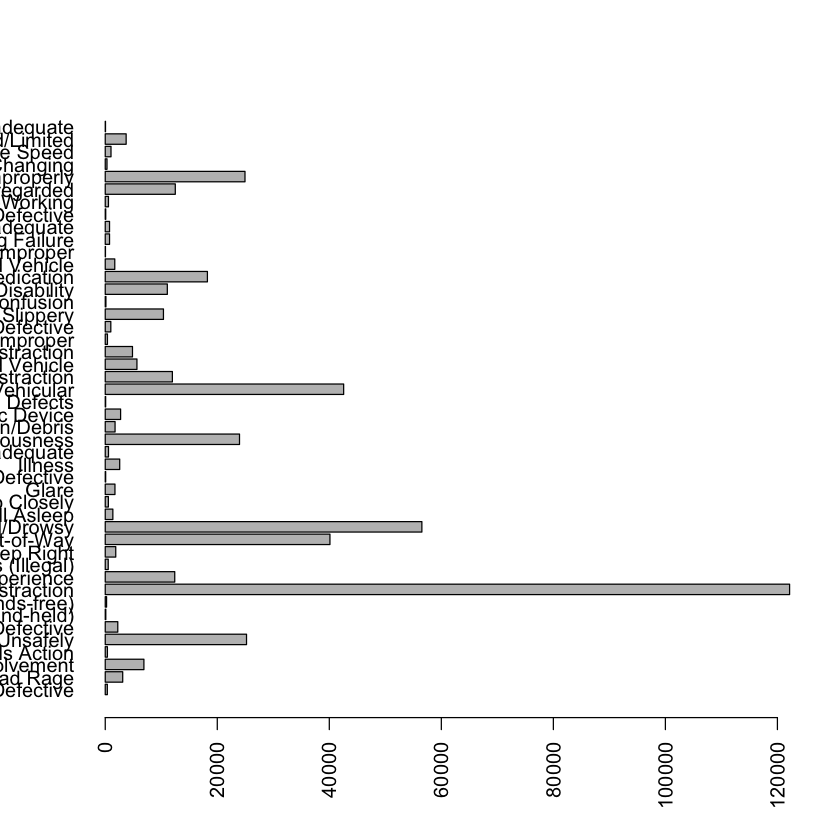

In [1]:
#ВАРИАНТ 2
#Вывести топ-5 самых опасных улиц для велосипедистов.  
#Вывести топ-5 факторов, по которым попадают в аварии таксисты. 
#Вывести медианное и среднее кол-во смертей для каждого из видов  транспортных средств, в случае если оно попало в аварию.  
#Построить гистограмму причин аварий, а также boxplot для вероятностей попасть в аварию на разных видах транспортных средств. 

#строим датафрейм, с который удобно работать (на каждую машину и улицу своя строка)
accidents <- read.csv(file="NYPD_Motor_Vehicle_Collisions.csv",head=TRUE, sep=",", na.strings=c("", "Unspecified"))

dublicate_accidents <- accidents
dublicate_accidents$ON.STREET.NAME <- accidents$OFF.STREET.NAME
dublicate_accidents$CONTRIBUTING.FACTOR.VEHICLE.1 <- accidents$CONTRIBUTING.FACTOR.VEHICLE.2
dublicate_accidents$VEHICLE.TYPE.CODE.1 <- accidents$VEHICLE.TYPE.CODE.2

total_accidents <- rbind(accidents, dublicate_accidents)

#ТОП-5 опасных улиц для велосипедистов
#Считаем, что 1 погибщий - это как 100 покалечившихся по опасности
cyclist <- aggregate(100*NUMBER.OF.CYCLIST.KILLED+NUMBER.OF.CYCLIST.INJURED ~ ON.STREET.NAME, total_accidents, sum)
cyclist <- subset(cyclist, !is.na(ON.STREET.NAME))
head(cyclist[order(desc(cyclist$`100 * NUMBER.OF.CYCLIST.KILLED + NUMBER.OF.CYCLIST.INJURED`)), ], 5)

#ТОП-5 причин аварий таксистов
taxists_factors <- aggregate((VEHICLE.TYPE.CODE.1 == "TAXI") ~ CONTRIBUTING.FACTOR.VEHICLE.1, total_accidents, sum)
head(taxists_factors[order(desc(taxists_factors$`(VEHICLE.TYPE.CODE.1 == "TAXI")`)), ], 5)

#Медианное и среднее кол-во смертей для каждого из видов  транспортных средств
mean_death <- aggregate(NUMBER.OF.PERSONS.KILLED ~ VEHICLE.TYPE.CODE.1, total_accidents, mean)
mean_death

median_death <- aggregate(NUMBER.OF.PERSONS.KILLED ~ VEHICLE.TYPE.CODE.1, total_accidents, median)
median_death

#Гистограмма причин аварий
factors <- aggregate(!is.na(VEHICLE.TYPE.CODE.1) ~ CONTRIBUTING.FACTOR.VEHICLE.1, total_accidents, sum)


barplot(factors$`!is.na(VEHICLE.TYPE.CODE.1)`, horiz = TRUE, names.arg = factors$CONTRIBUTING.FACTOR.VEHICLE.1, las=2)

